In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
file_pi0 = up.open("../../ML-Data/LAOD/True_Merged_Pi0.root")
file_bck = up.open("../../ML-Data/LAOD/True_Merged_Bck.root")

In [3]:
file_pi0.keys()

[b'True_Merged_Calo_Cluster_Pi0;1']

In [4]:
file_bck.keys()

[b'True_Merged_Calo_Cluster_Bck;1']

In [5]:
tree_pi0 = file_pi0["True_Merged_Calo_Cluster_Pi0;1"]
tree_bck = file_bck["True_Merged_Calo_Cluster_Bck;1"]
tree_pi0.keys()

[b'Cluster', b'ClusterType', b'E', b'Pt', b'ModuleNumber', b'X', b'Y']

In [6]:
tree_pi0.show()

Cluster                    (no streamer)              asdtype("('>f4', (50, 50))")
ClusterType                (no streamer)              asdtype('>i4')
E                          (no streamer)              asdtype('>f4')
Pt                         (no streamer)              asdtype('>f4')
ModuleNumber               (no streamer)              asdtype('>i4')
X                          (no streamer)              asdtype('>i4')
Y                          (no streamer)              asdtype('>i4')


In [7]:
pi0_df = tree_pi0.pandas.df(['ClusterType','E', 'Pt', 'ModuleNumber', 'X', 'Y'])
pi0_df.head()

,ClusterType,E,Pt,ModuleNumber,X,Y
entry,,,,,,
0,1,12.828090,12.331491,9,1,7
1,3,5.002871,4.704424,2,33,9
2,2,5.114742,4.699213,9,21,14
3,2,6.989845,6.701779,8,44,10
4,2,6.457879,6.196465,3,0,20


In [8]:
bck_df = tree_bck.pandas.df(['ClusterType','E', 'Pt', 'ModuleNumber', 'X', 'Y'])
bck_df.head()

,ClusterType,E,Pt,ModuleNumber,X,Y
entry,,,,,,
0,0,6.165426,4.964669,2,5,14
1,0,5.630670,5.021149,2,20,13
2,0,6.442088,6.157202,3,6,11
3,0,8.412970,6.655827,5,44,12
4,0,5.538481,4.972888,2,22,15


Number of pions N_pi0=116.0
Number of Bck N_bck=103.0


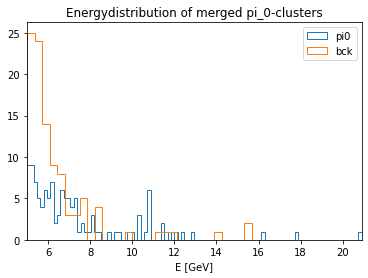

In [9]:
#Energy Histogram
counts, bins, _ = plt.hist(pi0_df['E'], bins=100, histtype='step', label='pi0')
countsb, binsb, _ = plt.hist(bck_df['E'], bins=100, histtype='step', label='bck')
plt.title('Energydistribution of merged pi_0-clusters')
plt.xlabel('E [GeV]')
plt.xlim(bins[0],bins[-1])
plt.legend()
print('Number of pions N_pi0={c}'.format(c=np.sum(counts)))
print('Number of Bck N_bck={c}'.format(c=np.sum(countsb)))

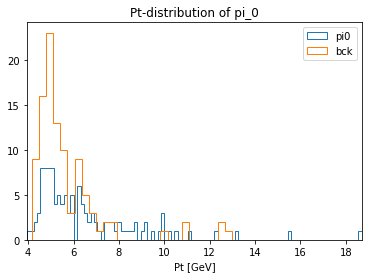

In [10]:
#Pt Histogram
counts, bins, _ = plt.hist(pi0_df['Pt'], bins=100, histtype='step', label='pi0')
counts2, bins2, _ = plt.hist(bck_df['Pt'], bins=100, histtype='step', label='bck')
plt.title('Pt-distribution of pi_0')
plt.xlabel('Pt [GeV]')
plt.xlim(bins[0],bins[-1])
plt.legend()

(0.5, 3.5)

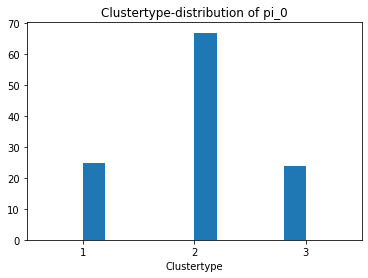

In [11]:
counts, bins, _ = plt.hist(pi0_df['ClusterType'], bins=10)
plt.title('Clustertype-distribution of pi_0')
plt.xlabel('Clustertype')
plt.xticks([1,2,3])
plt.xlim(0.5,3.5)

(-0.1, 10.0)

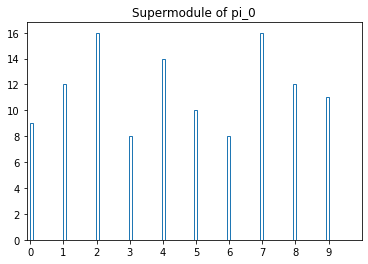

In [12]:
counts, bins, _ = plt.hist(pi0_df['ModuleNumber'], bins=100, histtype='step')
plt.title('Supermodule of pi_0')
plt.xticks(np.arange(0,10))
plt.xlim(-0.1,10)

(0.0, 46.0)

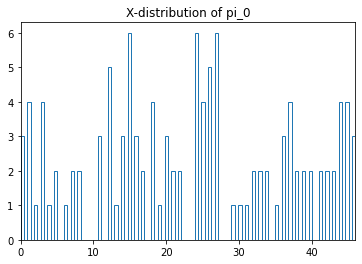

In [13]:
counts, bins, _ = plt.hist(pi0_df['X'], bins=100, histtype='step')
plt.title('X-distribution of pi_0')
plt.xlim(bins[0],bins[-1])

(0.0, 22.0)

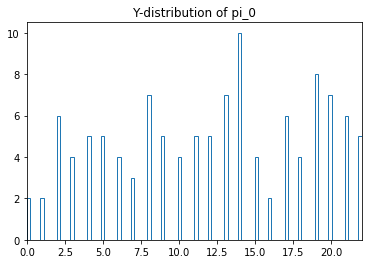

In [14]:
counts, bins, _ = plt.hist(pi0_df['Y'], bins=100, histtype='step')
plt.title('Y-distribution of pi_0')
plt.xlim(bins[0],bins[-1])

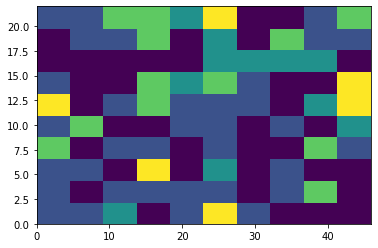

In [15]:
_ = plt.hist2d(pi0_df['X'],pi0_df['Y'])